<a href="https://colab.research.google.com/github/masoupas/IA-3/blob/main/ML_Exercises_DeepBusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img style="left;" src="https://github.com/masoupas/IA-3/blob/main/DeepBusters.JPG?raw=true" width=200 height=200/><span style="color:red; font-family:Georgia; text-align:center; font-size:10em;">  # DEEP BUSTERS</span>







   <br> **Juan Francisco Vallalta
    <br> Francisco Vaquer
    <br> Marina Souto**

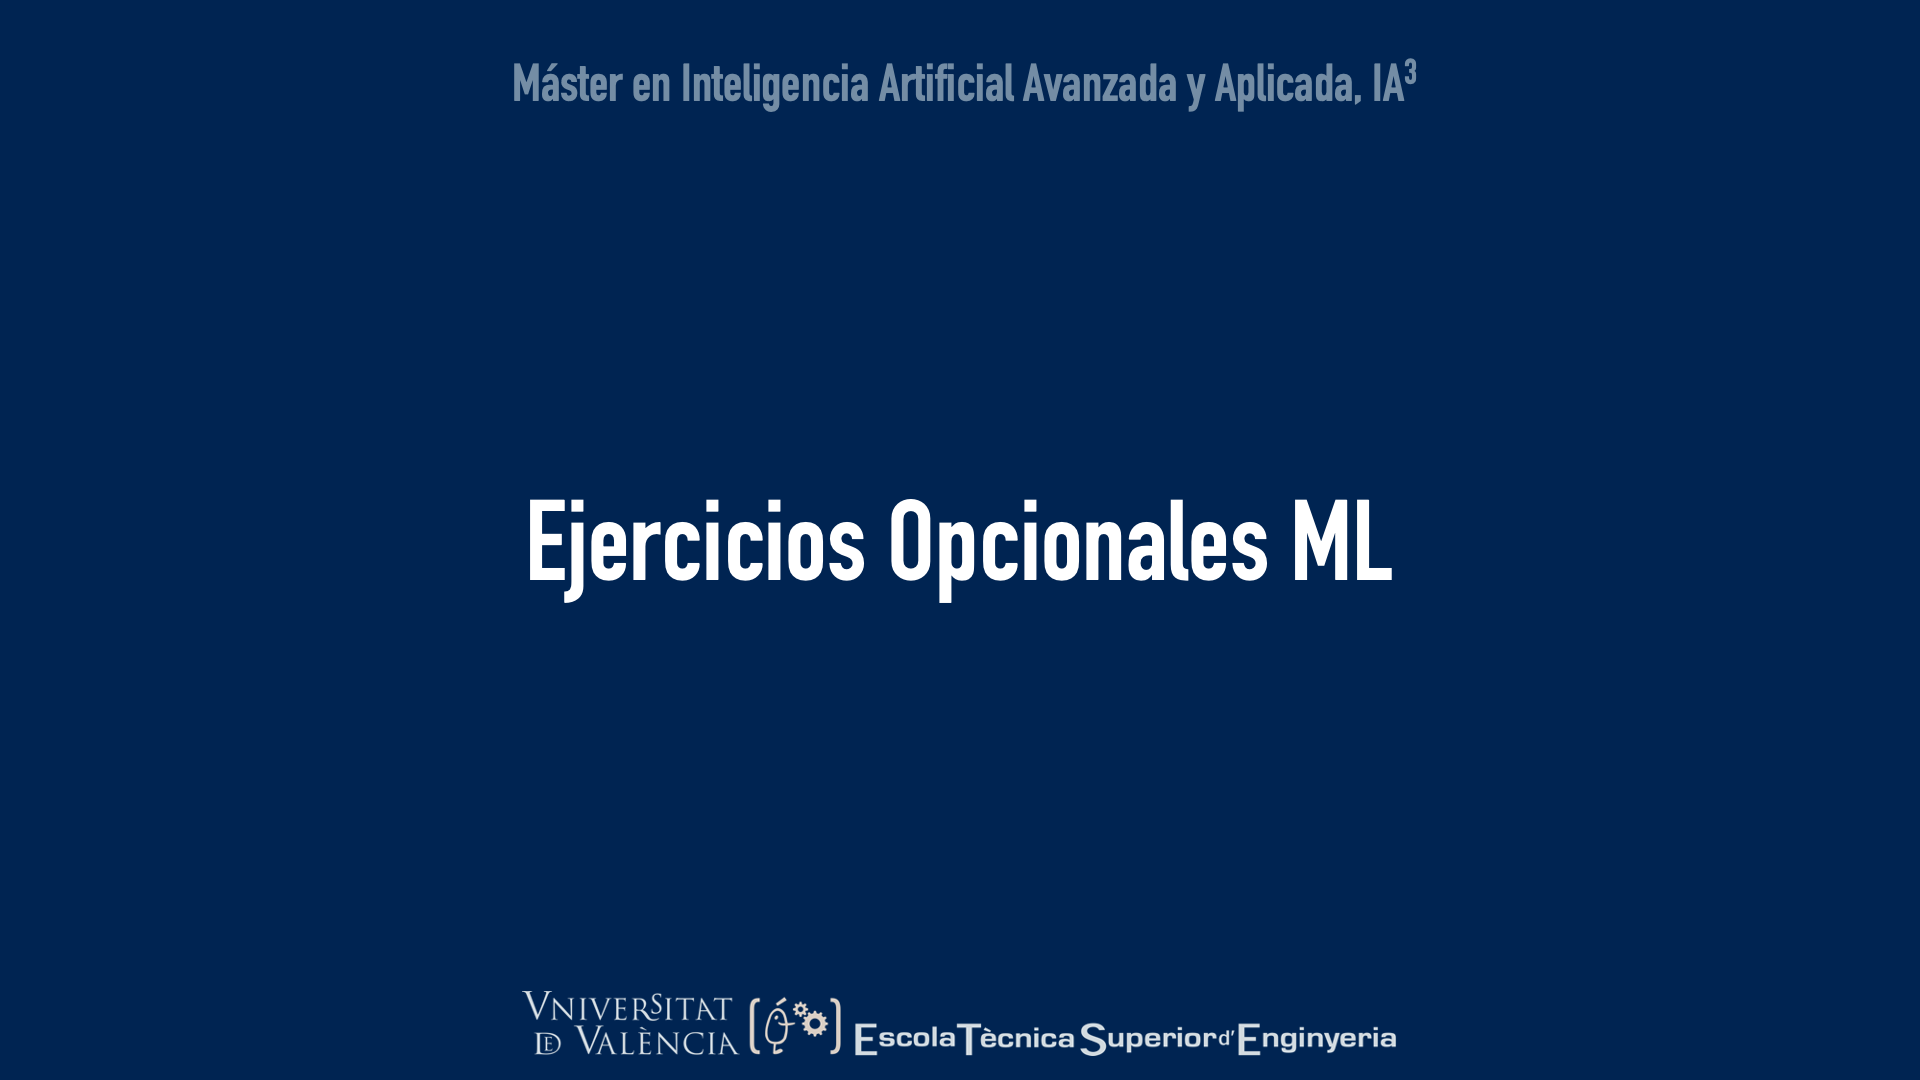

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

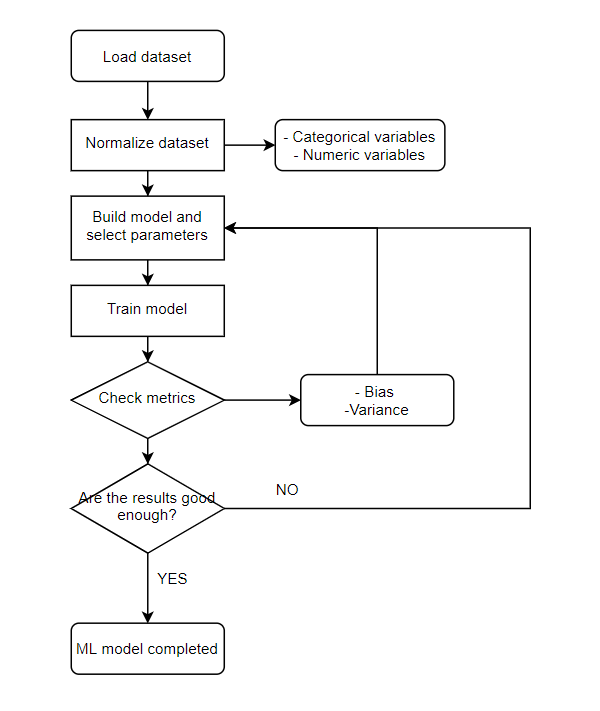

# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from math import log
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV 

# 1. DESCRIPTIVE STATISCTICS AND PREPROCESSING

In [ ]:
dataset = sns.load_dataset("penguins")
dataset.dropna(inplace=True)
dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [ ]:
dataset.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


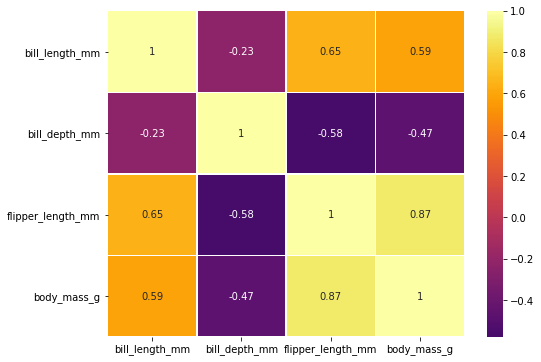

In [ ]:
## Correlation heatmap
plt.subplots(figsize=(8,6))
ax = sns.heatmap(dataset.corr(), center=0, linewidths=.5,annot=True, cmap='inferno')

In [ ]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


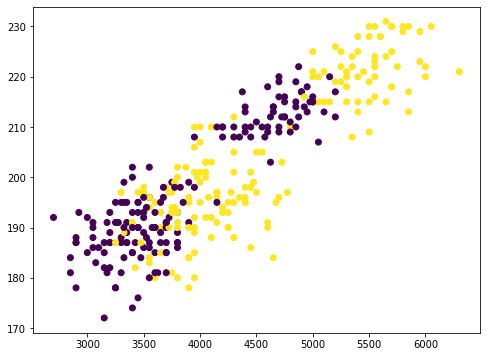

In [ ]:
dataset['color']=np.where(dataset['sex']== 'Male', 1, 0)
fig = plt.figure(figsize=(8, 6))
fig = plt.scatter(x=dataset["body_mass_g"], y=dataset["flipper_length_mm"] , c=dataset["color"])

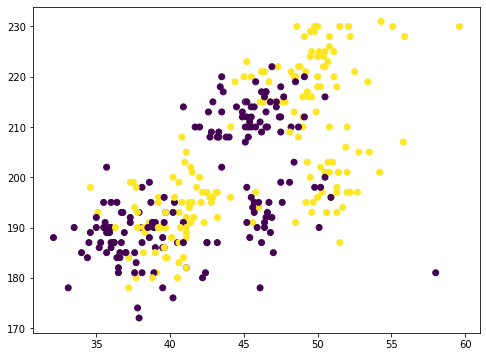

In [ ]:
fig = plt.figure(figsize=(8, 6))
fig = plt.scatter(x=dataset["bill_length_mm"], y=dataset["flipper_length_mm"] , c=dataset["color"])
plt.show()

In [ ]:
dataset = dataset.iloc[:,:-1]

In [ ]:
X = pd.get_dummies(dataset.iloc[:,:-1])

In [ ]:
Y = dataset.iloc[:,-1:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 150)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# NAIVE BAYES MODEL

In [ ]:
## NAIVE BAYES
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, np.ravel(Y_train))

print(naive_bayes.score(X_train, Y_train))
predict_nb = naive_bayes.predict(X_test) 
  
# print classification report 
print(classification_report(Y_test, predict_nb))

0.6909871244635193
              precision    recall  f1-score   support

      Female       0.77      0.74      0.75        54
        Male       0.71      0.74      0.72        46

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



In [ ]:
#NAIVE BAYES WITH BAGGING
base_estimator = GaussianNB()
model_bagging = BaggingClassifier(base_estimator, n_estimators=100, max_samples=15, max_features=6)
model_bagging.fit(X_train, np.ravel(Y_train))
print(model_bagging.score(X_train, Y_train))
bayes_baging_predictions = model_bagging.predict(X_test) 

# print classification report 
print(classification_report(Y_test, bayes_baging_predictions))

0.759656652360515
              precision    recall  f1-score   support

      Female       0.80      0.59      0.68        54
        Male       0.63      0.83      0.72        46

    accuracy                           0.70       100
   macro avg       0.72      0.71      0.70       100
weighted avg       0.72      0.70      0.70       100



In [ ]:
##NAIVE BAYES BAGGING WITH RANDOMIZED GRIDSEARCH
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

base_estimator = GaussianNB()
model_bagging_rs = BaggingClassifier(base_estimator, n_estimators=100, max_samples=20, max_features=6)
distributions = dict(n_estimators= range(75, 150), max_samples=range(10, 30))
bayes_bagging_rs= RandomizedSearchCV(model_bagging_rs, distributions)
search_bayes_rs = bayes_bagging_rs.fit(X_train, np.ravel(Y_train) )
print(bayes_bagging_rs.score(X_train, Y_train))
print(search_bayes_rs.best_params_)

bayes_bagging_rs_predictions = search_bayes_rs.predict(X_test) 
  
# # print classification report 
print(classification_report(Y_test, bayes_bagging_rs_predictions))

0.8025751072961373
{'n_estimators': 81, 'max_samples': 29}
              precision    recall  f1-score   support

      Female       0.84      0.80      0.82        54
        Male       0.78      0.83      0.80        46

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



**SUMARY NAIVE BAYES**

Naive Bayes models are based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Taken that into account, we chose to apply Gaussian Naive Bayes for classification in which the likelihood of the features is assumed to be Gaussian.

In this model due to the low number of attributes (only var_smooth), we focused on applying bagging to improve the performance. First deciding ourselves the parameters, and later on, employing a randomized grid search to find better parameters. Each of those steps increased slightly the accuracy achieved in the model.


# SUPPORT VECTOR MACHINE

In [ ]:
model = SVC(probability=True, random_state=150)
model.fit(X_train, Y_train['sex'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=150, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
predictions = model.predict(X_test) 
print(classification_report(Y_test['sex'], predictions))

              precision    recall  f1-score   support

      Female       0.96      0.93      0.94        54
        Male       0.92      0.96      0.94        46

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [ ]:
model.score(X_train, Y_train['sex'])

0.927038626609442

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, Y_train['sex']) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.766, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.872, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.766, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.761, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.717, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.851, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.522, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.522, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.532, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.532, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.511, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.522, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.522, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

      Female       0.96      0.93      0.94        54
        Male       0.92      0.96      0.94        46

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [ ]:
grid.score(X_train, Y_train['sex'])

0.9055793991416309

In [ ]:
grid.score(X_test, Y_test['sex'])

0.94

In [ ]:
new_probs = []
for value in Y_test['sex']:
  if value == "Male":
    new_probs.append(1.0)
  else:
    new_probs.append(0.0)

In [ ]:
fpr, tpr, thresholds = roc_curve(new_probs, list(grid.predict_proba(X_test)[:,1]), drop_intermediate=False)
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})

In [ ]:
df_roc

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000
1,0.000000,0.021739,1.000000
2,0.000000,0.043478,1.000000
3,0.000000,0.065217,1.000000
4,0.000000,0.086957,0.999999
...,...,...,...
96,0.925926,1.000000,0.001834
97,0.944444,1.000000,0.001311
98,0.962963,1.000000,0.001242
99,0.981481,1.000000,0.000367


In [ ]:
#fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
#fig.show()

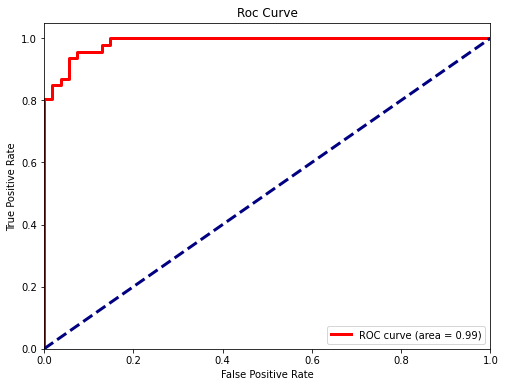

In [ ]:
lw = 3
fig = plt.figure(figsize=(8, 6))
plt.plot(df_roc['fpr'], df_roc['tpr'], color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(new_probs, list(grid.predict_proba(X_test)[:,1])))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(new_probs, list(grid.predict_proba(X_test)[:,1]))

0.9871175523349437

**SUMMARY SVC**

We use the model Support Vector Machine SVC(). We thought that we could improve the model by modifying the hyperparameters, we decided to use the GridSearchCV() function.

We use Grid Search as a cross validation methodology. We pass to the function the model and the dictionaries that contain the hyperparameters that we wish evaluate. 

We evaluate the next hyperparameters:

- kernel: We use the kernel 'rbf'. This kernel have two advantages: only have two hyperparameters to optimize, gamma and C, and it's flexibility could be from a linear classification to a complex classification.
- gamma: Gamma value controls the behavior of the kernel.  When we have a low value, the final final model is similar to a linear kernel. As its value increases, its flexibility increases.
- C: This parameter controls the balance between bias and variance. When we have a low value in C, errors are penalized less. With a greater value of C,  less observations are considered Support Vectors and the classification will be less bias but higher variance.

In this case, we pass the next dictionari to find the best parameter combination:

 param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 


